### Step 1)LOAD DATA INTO JUPYTER 

In [1]:
import pandas as pd
import numpy as np
import xlrd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_excel('pima-data.xlsx')
df.shape
df.head(2)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False


In [3]:
df.info

<bound method DataFrame.info of      num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
0           6           148            72         35        0  33.6   
1           1            85            66         29        0  26.6   
2           8           183            64          0        0  23.3   
3           1            89            66         23       94  28.1   
4           0           137            40         35      168  43.1   
..        ...           ...           ...        ...      ...   ...   
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age  diabetes_orig    skin  has_diabetes  diabetes  
0        0.627   50              1  1.3790    

### STEP 2: Clean data
### (2.a) Let us find if there are any null values

In [4]:
df.isnull().values.any()

False

### (2.b) Let us find duplicate columns (or) co-related columns
### First check how many columns are there --->12

In [5]:
def plot_corr(df, size=12):
    corr = df.corr() #pandas data frame correlation function
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) #color code the rectangles by correlation values
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

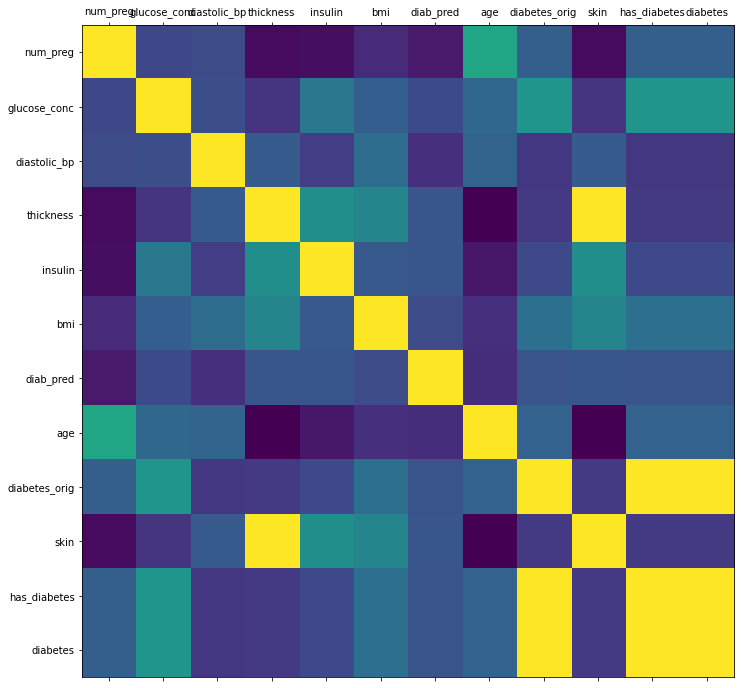

In [6]:
#call the above function -> to draw correlation function
plot_corr(df)

In [7]:
# we are going to remove thickness, has_diabites and diabites origren 

In [8]:
del df['thickness']
del df['has_diabetes']
del df['diabetes_orig']

In [9]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


## 2c-lets convert text to numbers
### machine learning algorithm will not understand text. so covert them to numbers.

In [10]:
diabetes_map = {True:1, False:0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [11]:
df.head(5) #now observe last column is changed

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


In [12]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print('true = ', (num_true/ (num_true+num_false) )*100 )
print('false = ', (num_false/ (num_true+num_false) )*100 )

true =  34.89583333333333
false =  65.10416666666666


#### in case of data imbalence we use SMOTE technique to increase lesser data samples.
### Step 3: Train Test Split
#### let us split our data for traning and testing the algorithm

In [13]:
feature_col_names = ['num_preg','glucose_conc', 'diastolic_bp', 'skin','insulin','bmi','diab_pred','age']
predicted_class_names = ['diabetes']
x = df[feature_col_names].values #predictor feature columns (8Xm)
y = df[predicted_class_names].values

split_test_size = 0.30
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=split_test_size, random_state=42)


In [14]:
#make sure training data and testing data is 70% and 30%
print('{0:0.2f}% in training set'.format( (len(x_train)/len(df.index))*100 ))
print('{0:0.2f}% in testing set'.format( (len(x_test)/len(df.index))*100 ))

69.92% in training set
30.08% in testing set


In [15]:
 #original data has 35% diabetes true and 65% diabetes false..same should persist after split
print('training true : {0} ({1:0.2}%)'.format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100)) )
print('training false : {0} ({1:0.2}%)'.format(len(y_train[y_train[:] == 0]),(len(y_train[y_train[:] == 0])/len(y_train) * 100)) )
print('test true : {0} ({1:0.2}%)'.format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100)) )
print('test false : {0} ({1:0.2}%)'.format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100)) )

training true : 188 (3.5e+01%)
training false : 349 (6.5e+01%)
test true : 80 (3.5e+01%)
test false : 151 (6.5e+01%)


In [16]:
#lets find how many rows having unexpected 0 values
print('# rows in dataframe {0}'.format(len(df)))
print('# rows missing glucose_conc : {0}'.format(len(df.loc[df['glucose_conc']== 0])))
print('# rows missing diastolic_bp : {0}'.format(len(df.loc[df['diastolic_bp']== 0])))
print('# rows missing thickness : {0}'.format(len(df.loc[df['skin']== 0])))
print('# rows missing insulin : {0}'.format(len(df.loc[df['insulin']== 0])))
print('# rows missing bmi : {0}'.format(len(df.loc[df['bmi']== 0])))
print('# rows missing diab_pred : {0}'.format(len(df.loc[df['diab_pred']== 0])))
print('# rows missing age : {0}'.format(len(df.loc[df['age']== 0])))

# rows in dataframe 768
# rows missing glucose_conc : 5
# rows missing diastolic_bp : 35
# rows missing thickness : 227
# rows missing insulin : 374
# rows missing bmi : 11
# rows missing diab_pred : 0
# rows missing age : 0


In [17]:
print(len(df.loc[df['glucose_conc']== 0]))

5


In [18]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0,strategy='mean')
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [19]:
x_train[0:10]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 7.09200000e-01,
        5.80000000e+01, 2.39000000e+01, 2.60000000e-01, 2.20000000e+01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 1.14260000e+00,
        3.25000000e+02, 3.69000000e+01, 1.59000000e-01, 2.80000000e+01],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 1.65480000e+00,
        2.50000000e+02, 4.23000000e+01, 3.65000000e-01, 2.40000000e+01],
       [4.00000000e+00, 1.31000000e+02, 6.80000000e+01, 8.27400000e-01,
        1.66000000e+02, 3.31000000e+01, 1.60000000e-01, 2.80000000e+01],
       [1.00000000e+00, 1.03000000e+02, 3.00000000e+01, 1.49720000e+00,
        8.30000000e+01, 4.33000000e+01, 1.83000000e-01, 3.30000000e+01],
       [2.00000000e+00, 8.20000000e+01, 5.20000000e+01, 8.66800000e-01,
        1.15000000e+02, 2.85000000e+01, 1.69900000e+00, 2.50000000e+01],
       [3.00000000e+00, 1.28000000e+02, 7.80000000e+01, 1.12871227e+00,
        1.55333333e+02, 2.11000000e+01, 2.68000000e-01, 5.

## Step 4- TRAIN THE MODEL (USING ALGORITHM)

In [20]:
from sklearn.naive_bayes import GaussianNB
#create gaussian naive bayes model object and train it with data
nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

GaussianNB()

In [21]:
# lets test the algorithm's accuracy with training data itself

In [22]:
#predict values using the trining data
nb_predict_train = nb_model.predict(x_train)
#import the performance metrics library
from sklearn import metrics
#accuracy
print('accuracy : {0:.4f}'.format(metrics.accuracy_score(y_train, nb_predict_train)))
print()


accuracy : 0.7542



# Step 5 - Testing the model

In [23]:
nb_predict_test = nb_model.predict(x_test)
from sklearn import metrics
print('accuracy : {0:.4f}'.format(metrics.accuracy_score(y_test, nb_predict_test)))

accuracy : 0.7359


## step 6- ANALYZE THE MODEL ACCURACY

### With the help of "confusion matrix" we can analyze algorithms performance 

In [24]:
print('confusion matrix')
print('{0}'.format(metrics.confusion_matrix(y_test, nb_predict_test)))
print('')
print('classification report')
print(metrics.classification_report(y_test, nb_predict_test))

confusion matrix
[[118  33]
 [ 28  52]]

classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



### final observation of navie bayes algo=>accuracy 73%, recal 83%
### type 2 error values should be less compared to type 1 error

In [25]:
# let us try random forest algorithm

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train.ravel())
rf_predict_train = rf_model.predict(x_train)
#training metrics
print('accuracy : {0:.4f}'.format(metrics.accuracy_score(y_train, rf_predict_train)))

accuracy : 1.0000


In [27]:
rf_predict_test = rf_model.predict(x_test)
#training metrics
print('accuracy : {0:.4f}'.format(metrics.accuracy_score(y_test, rf_predict_test)))

accuracy : 0.7403


In [28]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print('')
print('classification report')
print(metrics.classification_report(y_test, rf_predict_test))

[[119  32]
 [ 28  52]]

classification report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [29]:
# let us try with logistic regression algorithm

In [30]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.7, random_state = 42) #c is hyperparameter value
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)
#training metrics
print('accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test, lr_predict_test)))
print('')
print(metrics.confusion_matrix(y_test, lr_predict_test))
print('')
print('classification report')
print(metrics.classification_report(y_test, lr_predict_test))

accuracy: 0.7359

[[123  28]
 [ 33  47]]

classification report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



C:\Users\Gattu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### final conclusion-we are suggesting random forest algorithm for this project as the accuracy is 75% and recall value is 82%  which is higher than other 2 algorithms